<a href="https://colab.research.google.com/github/anjithsm/DataScience/blob/main/Casestudy_on_Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [65]:
df = pd.read_csv('/content/Training_data.csv')
df_test = pd.read_csv('/content/Testing_data.csv')

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [67]:
df.shape

(5634, 21)

In [68]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1980,5364-XYIRR,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,4812.75,Yes
427,4489-SNOJF,Female,0,Yes,Yes,35,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,72.25,2568.55,Yes
1533,5797-APWZC,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,90.60,90.6,Yes
5616,8190-ZTQFB,Male,0,No,No,41,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,51.35,2075.1,No
547,8329-UTMVM,Male,1,No,No,27,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.65,2964,No


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [70]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", float('nan')).astype(float)
df_test['TotalCharges'] = df_test['TotalCharges'].replace(" ", float('nan')).astype(float)


In [71]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [72]:
df.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [73]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

<ipython-input-73-a210b873ac53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)
<ipython-input-73-a210b873ac53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [74]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [75]:
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)

<ipython-input-75-0acd1b5afdf9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)


In [76]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [77]:
df_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [78]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.159744,32.606851,65.490034,2167.382428
std,0.366401,24.614976,29.020760,2263.594869
min,0.000000,0.000000,18.250000,18.850000
25%,0.000000,9.000000,44.000000,296.437500
50%,0.000000,29.000000,70.650000,1267.500000
75%,0.000000,56.000000,89.100000,3590.537500
max,1.000000,72.000000,118.750000,8684.800000


In [79]:
df.duplicated().sum()

0

In [80]:
for col in df.columns:
  unique_vals = df[col].unique()
  print(f"Column '{col}':")
  print(unique_vals)
  print(f"Total unique values: {len(unique_vals)}")
  print("-" * 20)


Column 'customerID':
['9509-MPYOD' '7746-AWNQW' '2208-UGTGR' ... '4277-BWBML' '9110-HSGTV'
 '3402-XRIUO']
Total unique values: 5634
--------------------
Column 'gender':
['Female' 'Male']
Total unique values: 2
--------------------
Column 'SeniorCitizen':
[0 1]
Total unique values: 2
--------------------
Column 'Partner':
['No' 'Yes']
Total unique values: 2
--------------------
Column 'Dependents':
['No' 'Yes']
Total unique values: 2
--------------------
Column 'tenure':
[35 28 56 39 43  2 18 63 40 53 48 72 61  6 21  9  3 58 57 17 30 20  4 16
 71 38  5 13 55 60 37  1  7 11 12 67 54  8 22 65 36 50 23 49 69 70 25 14
 10 52 68 33 24 66 59 32 27 29 45 42 64 62 19 41 51 44 34 26 47 31 15 46
  0]
Total unique values: 73
--------------------
Column 'PhoneService':
['Yes' 'No']
Total unique values: 2
--------------------
Column 'MultipleLines':
['No' 'No phone service' 'Yes']
Total unique values: 3
--------------------
Column 'InternetService':
['No' 'DSL' 'Fiber optic']
Total unique values: 3

In [81]:
df = df.drop('customerID', axis=1)
df_test = df_test.drop('customerID', axis=1)

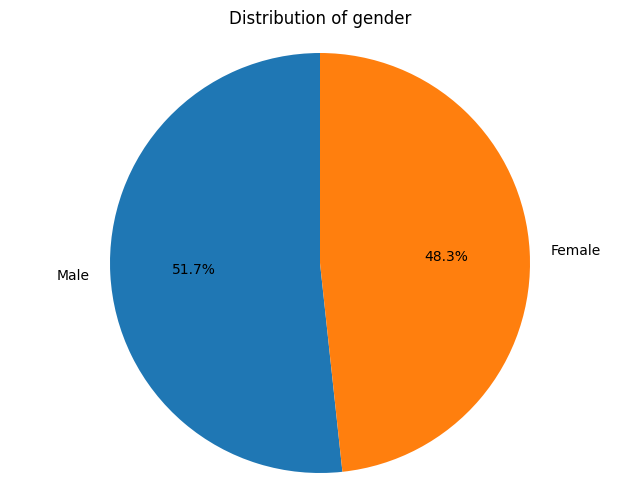

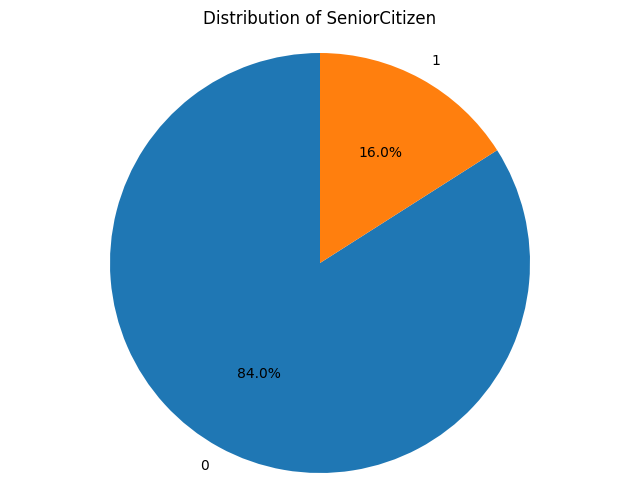

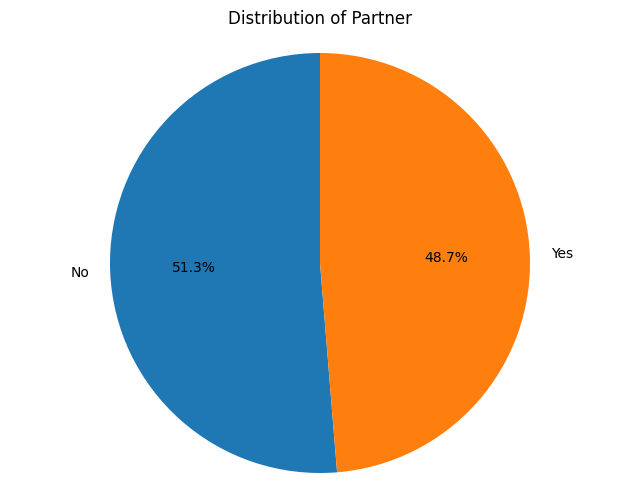

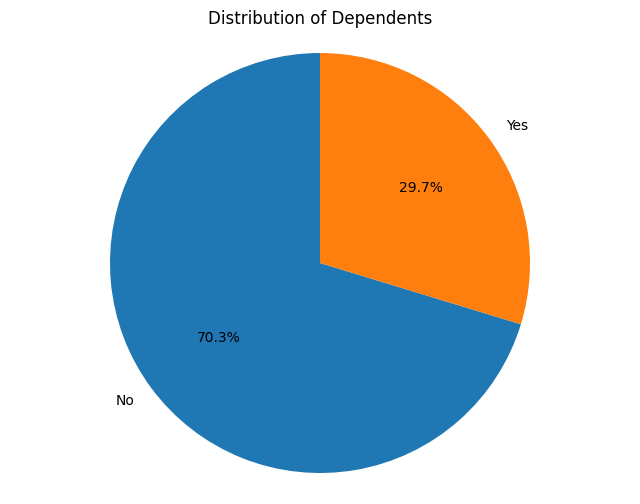

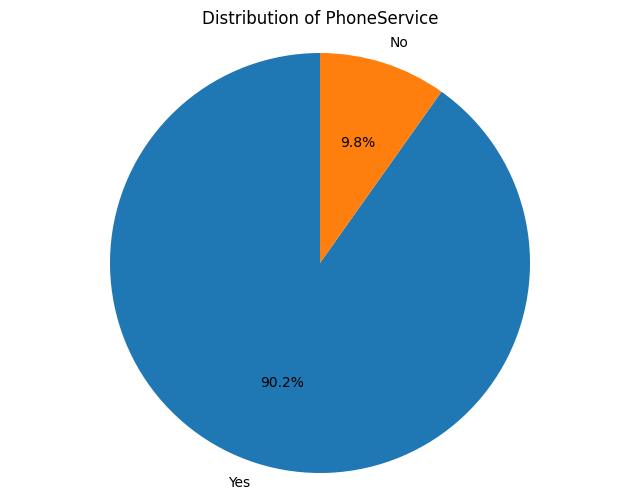

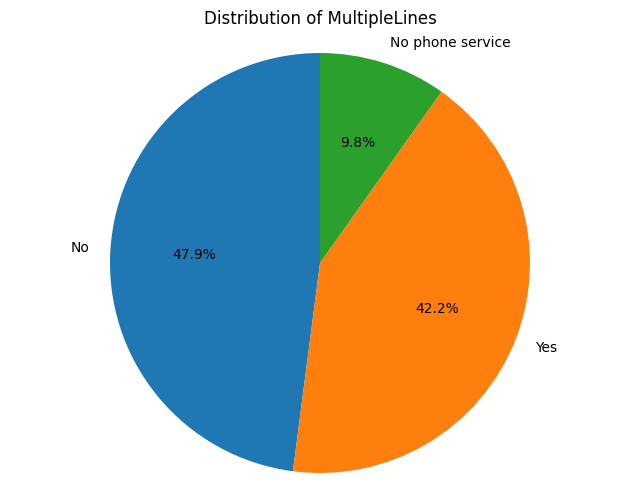

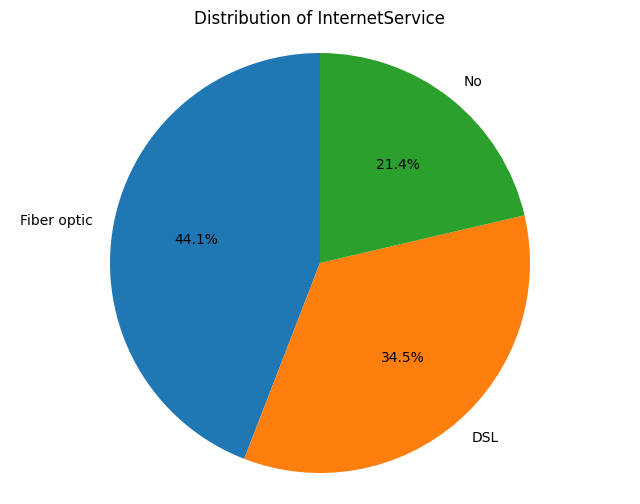

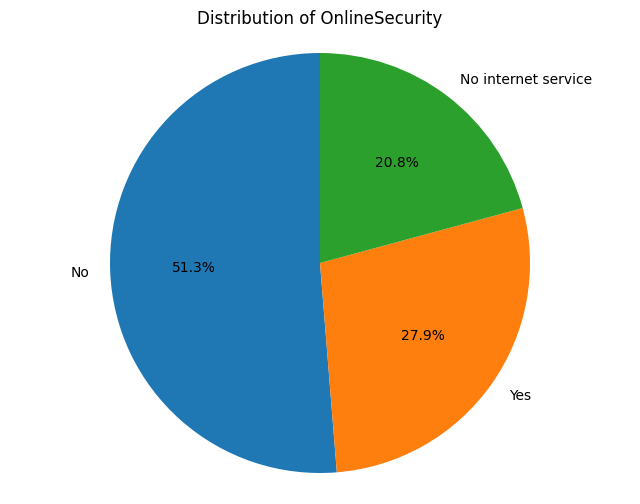

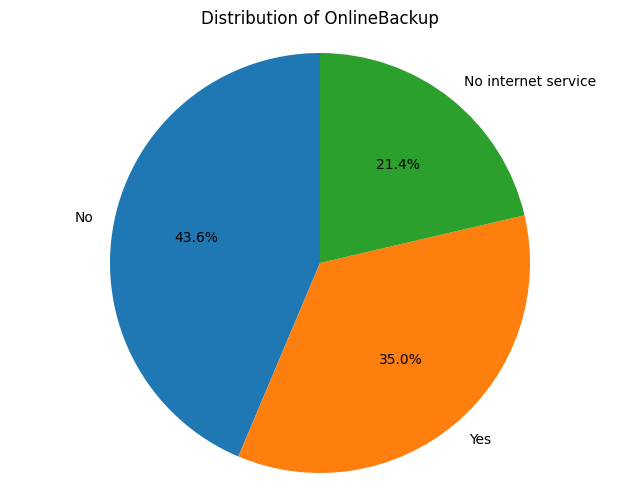

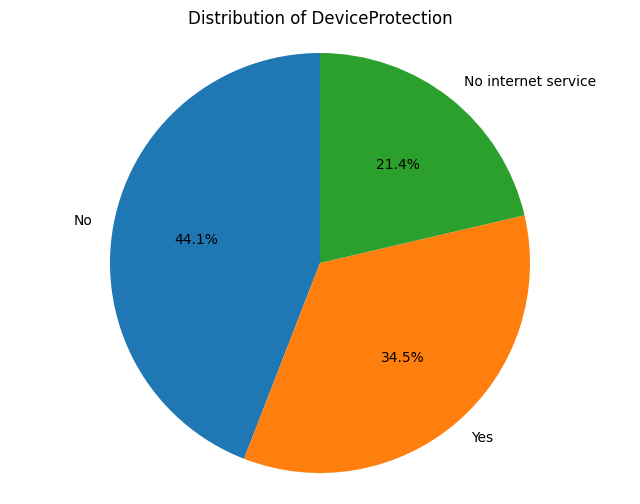

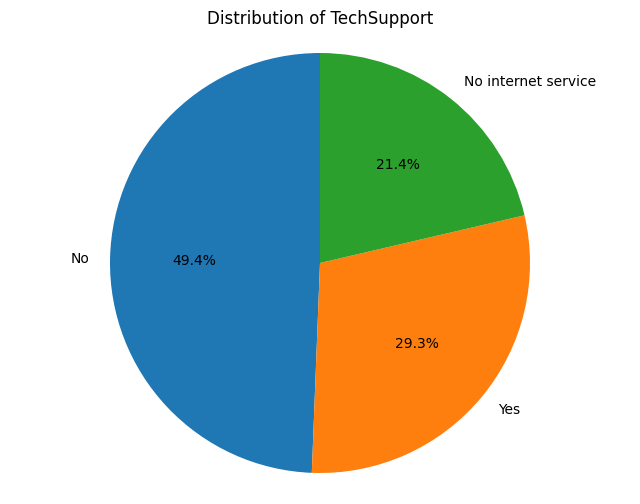

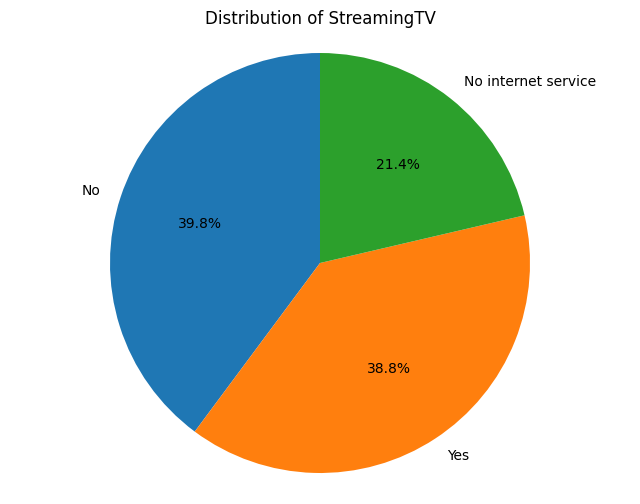

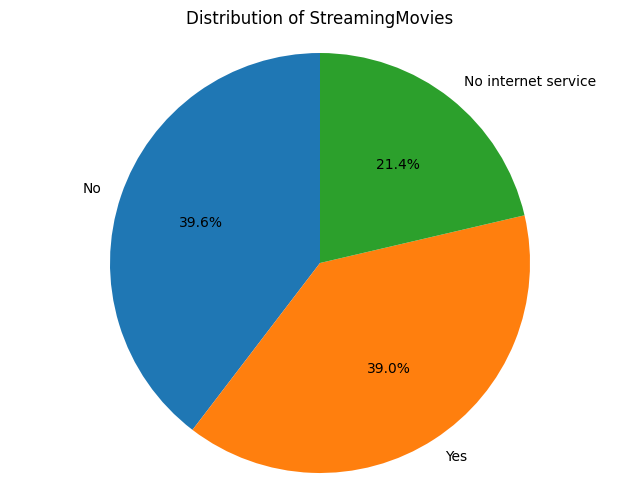

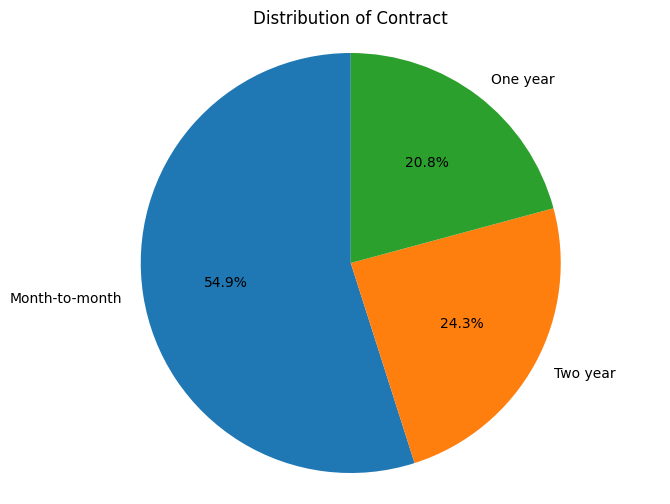

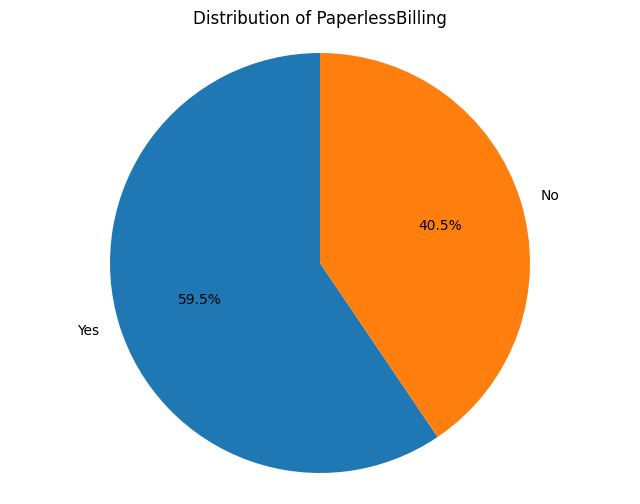

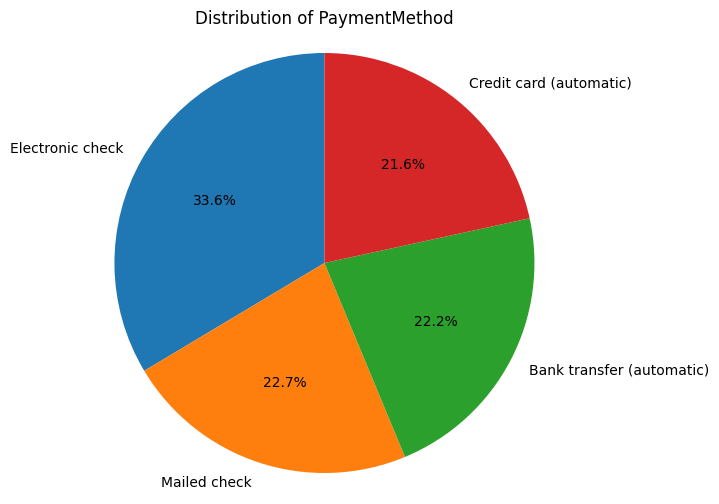

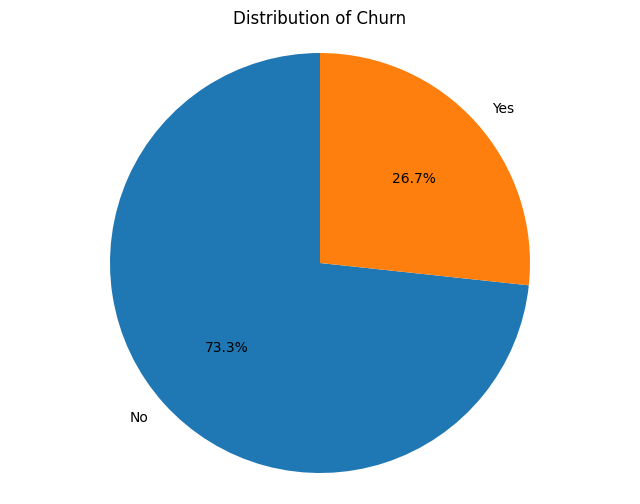

In [82]:
# Exclude 'MonthlyCharges', 'TotalCharges', and 'tenure'
columns_to_plot = [col for col in df.columns if col not in ['MonthlyCharges', 'TotalCharges', 'tenure']]

# Create the pie chart
for col in columns_to_plot:
  value_counts = df[col].value_counts()

  plt.figure(figsize=(8, 6))
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribution of {col}')
  plt.axis('equal')
  plt.show()


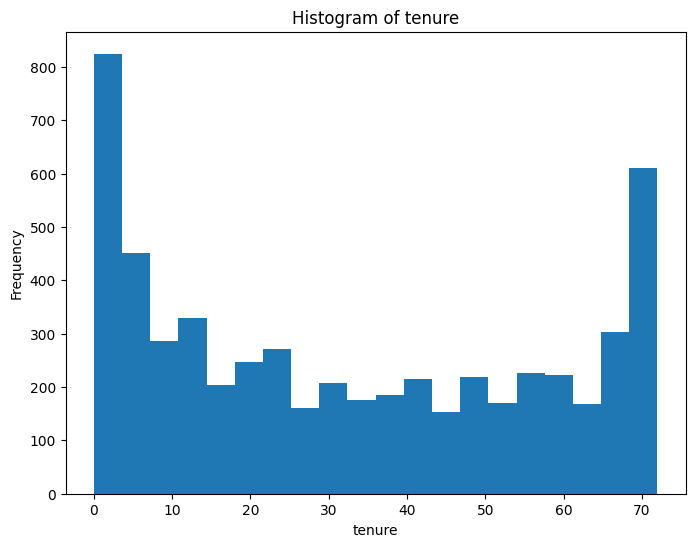

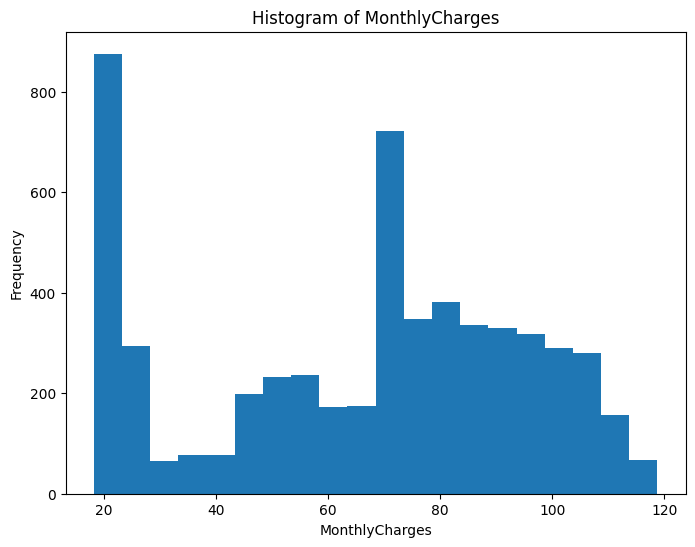

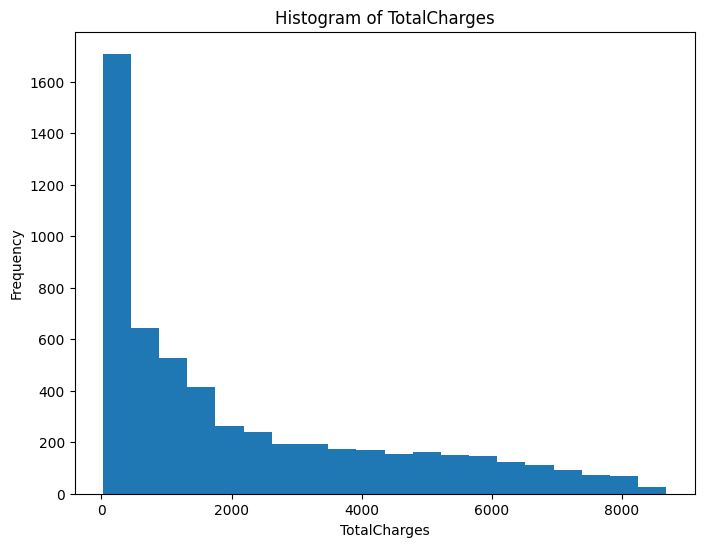

In [83]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col != 'SeniorCitizen']

# Plot histograms for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()


<ipython-input-84-662155319b6f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


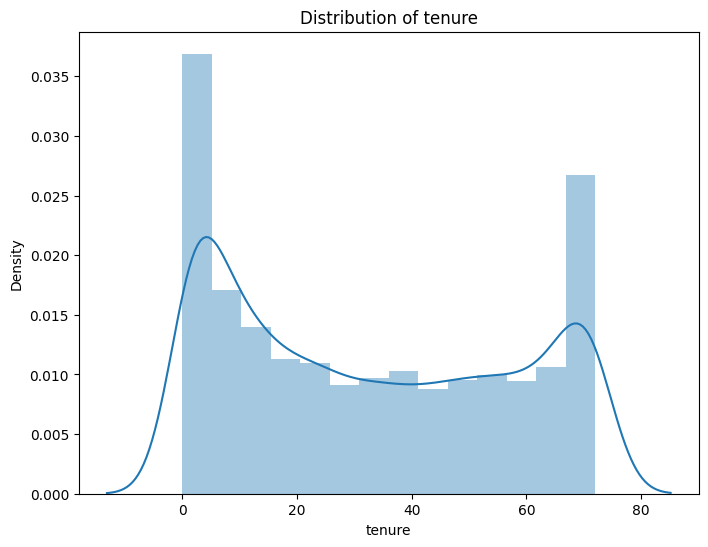

<ipython-input-84-662155319b6f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


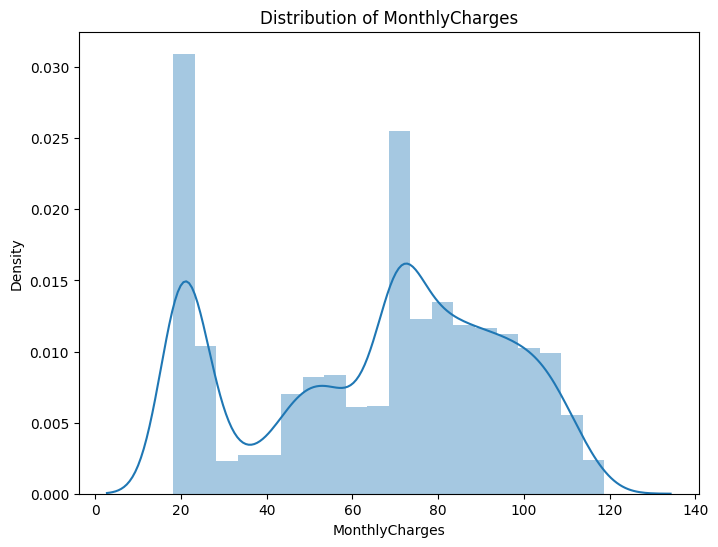

<ipython-input-84-662155319b6f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


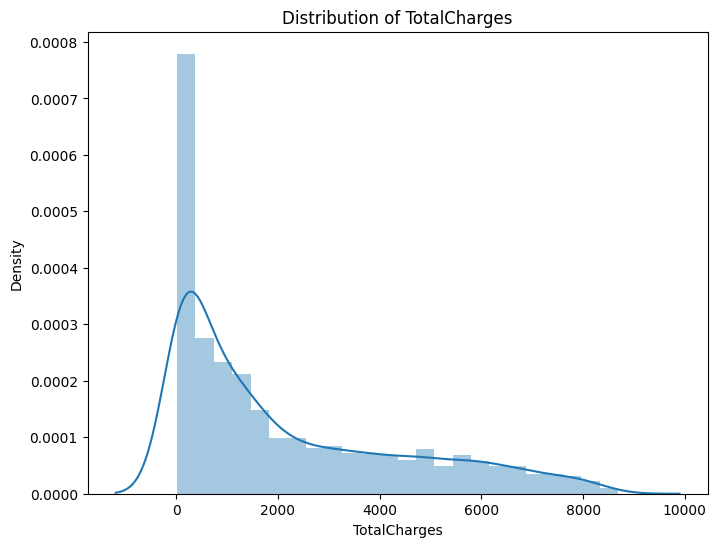

In [84]:
# Plot distribution plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.distplot(df[col])
  plt.xlabel(col)
  plt.title(f'Distribution of {col}')
  plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


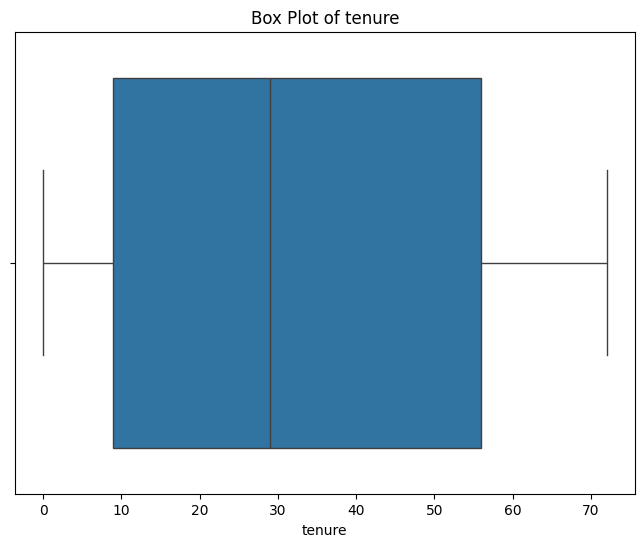

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


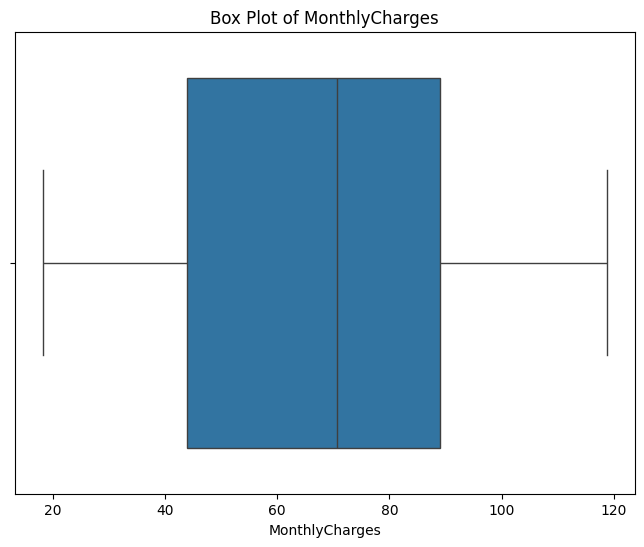

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


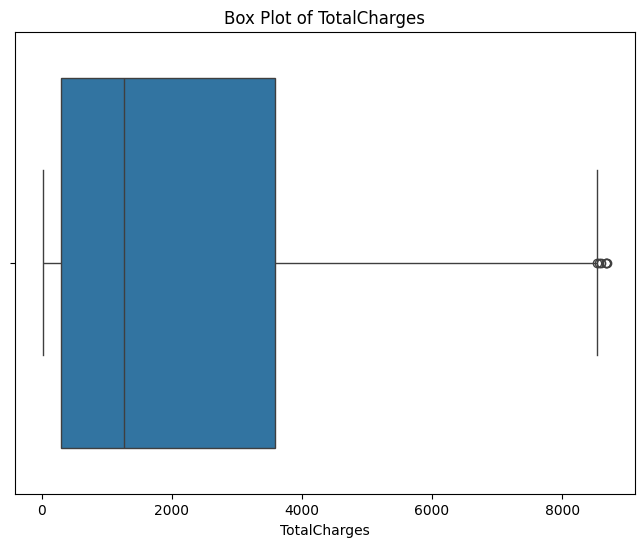

In [85]:
# Plot box plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


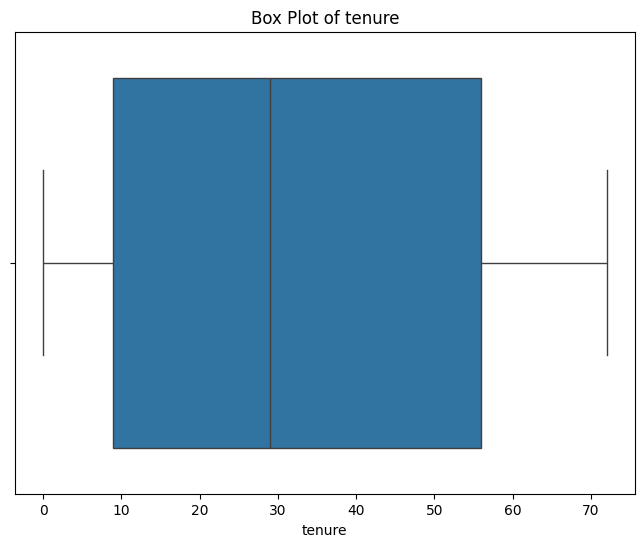

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


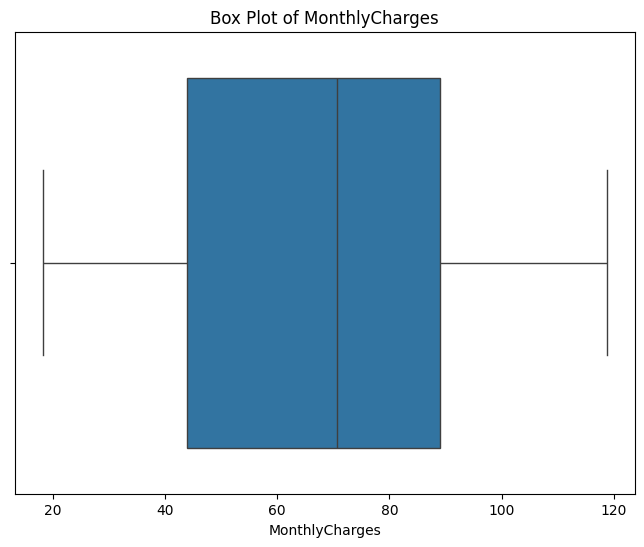

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


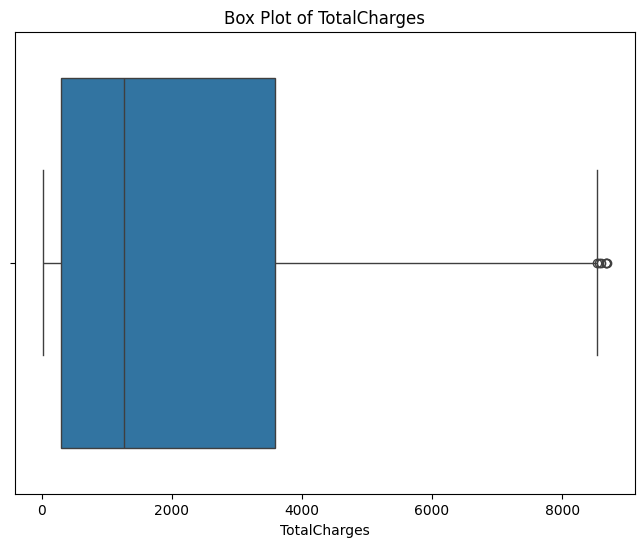

In [86]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols_t = df_test.select_dtypes(include=np.number).columns
numerical_cols_t = [col for col in numerical_cols if col != 'SeniorCitizen']

# Plot box plots for numerical columns
for col in numerical_cols_t:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.show()

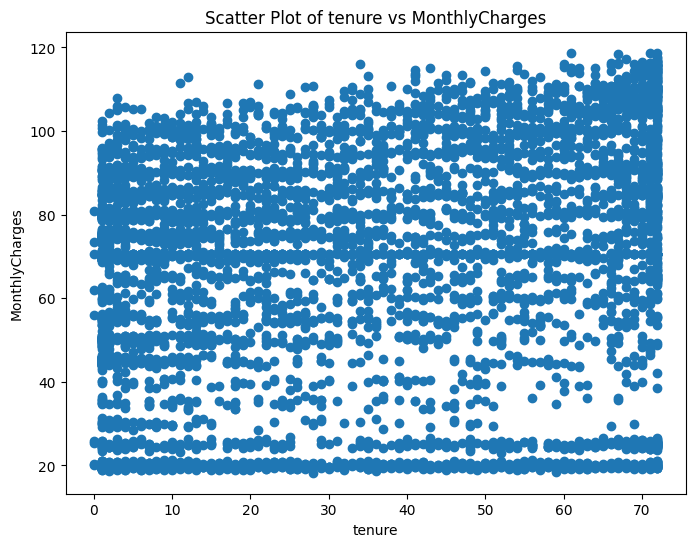

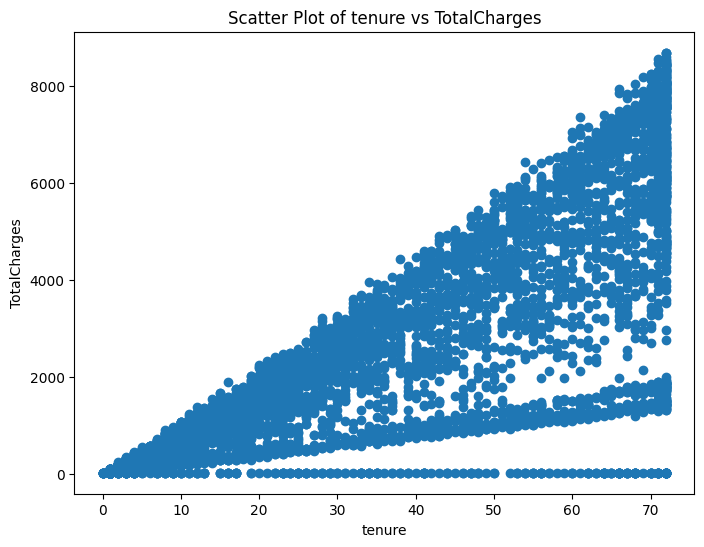

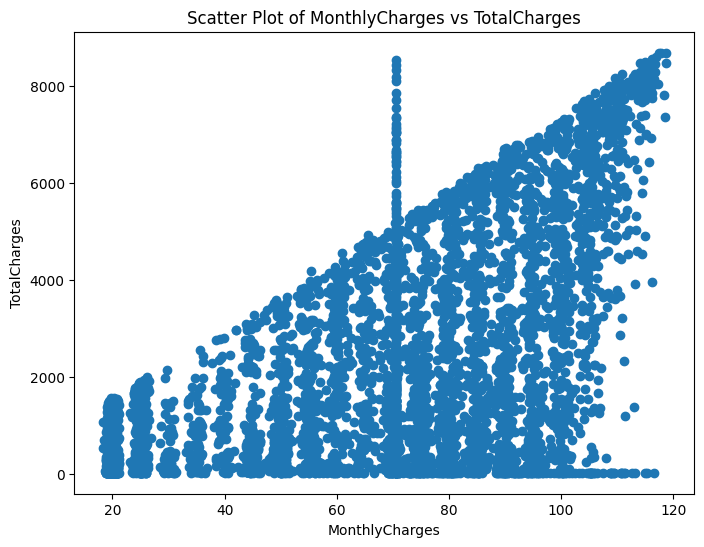

In [87]:
# Create scatter plots for pairs of numerical columns
for i in range(len(numerical_cols)):
  for j in range(i + 1, len(numerical_cols)):
    col1 = numerical_cols[i]
    col2 = numerical_cols[j]
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()


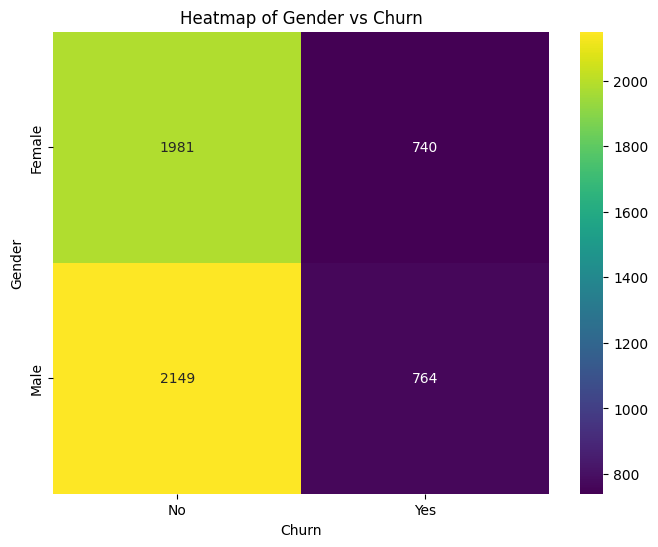

In [88]:
# Create a contingency table
gender_churn_table = pd.crosstab(df['gender'], df['Churn'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gender_churn_table, annot=True, fmt="d", cmap="viridis")
plt.title("Heatmap of Gender vs Churn")
plt.xlabel("Churn")
plt.ylabel("Gender")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

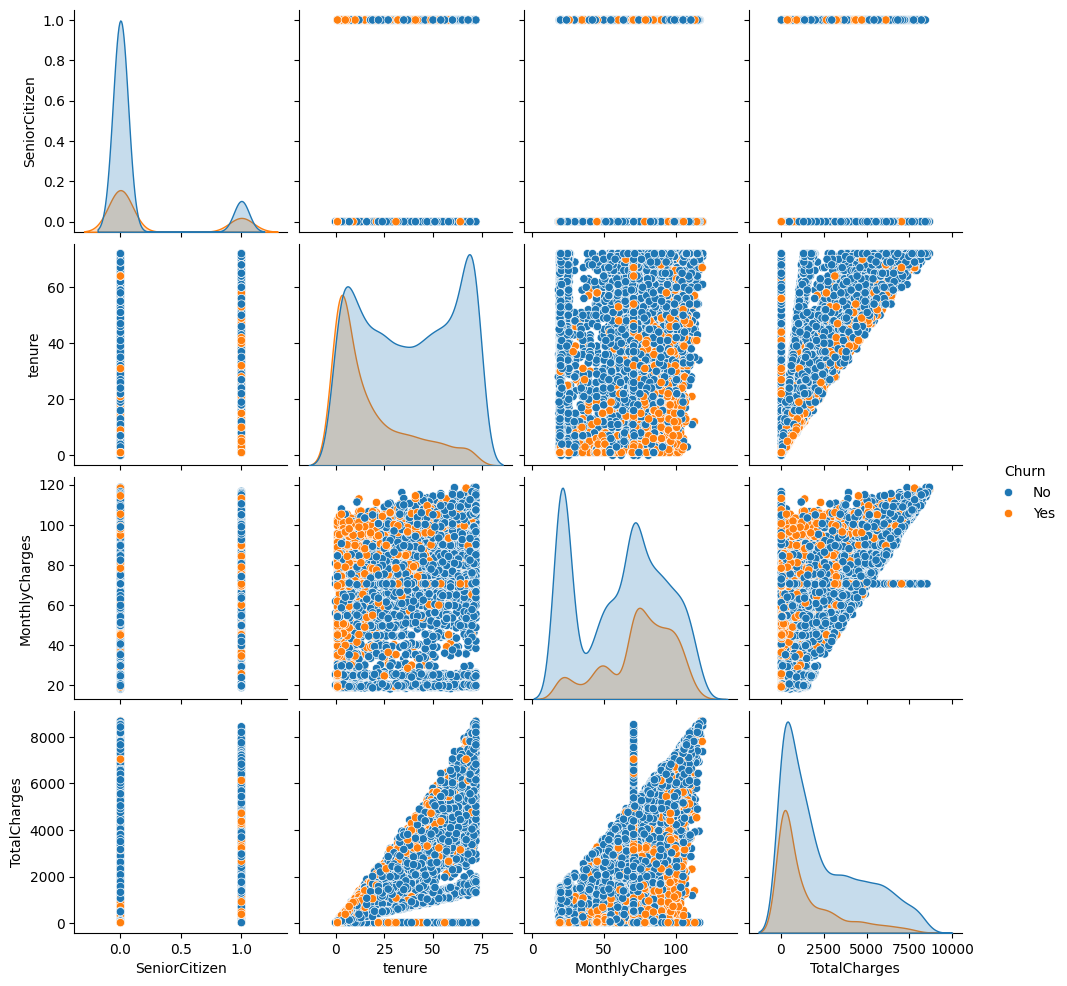

In [89]:
sns.pairplot(df, hue='Churn')
plt.show()


In [90]:
# Calculate the total charge per month
df['ChargePerMonth'] = df['TotalCharges'] / df['tenure']
df_test['ChargePerMonth'] = df_test['TotalCharges'] / df_test['tenure']

# Create a new feature for the interaction between tenure and monthly charges
df['TenureMonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
df_test['TenureMonthlyCharges'] = df_test['tenure'] * df_test['MonthlyCharges']

# Create a new feature for the ratio of total charges to monthly charges
df['TotalMonthlyChargeRatio'] = df['TotalCharges'] / df['MonthlyCharges']
df_test['TotalMonthlyChargeRatio'] = df_test['TotalCharges'] / df_test['MonthlyCharges']

# Create a new feature for the difference between total charges and monthly charges
df['TotalMonthlyChargeDiff'] = df['TotalCharges'] - df['MonthlyCharges']
df_test['TotalMonthlyChargeDiff'] = df_test['TotalCharges'] - df_test['MonthlyCharges']

In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargePerMonth,TenureMonthlyCharges,TotalMonthlyChargeRatio,TotalMonthlyChargeDiff
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,...,One year,No,Mailed check,20.75,700.45,No,20.012857,726.25,33.756627,679.70
1,Female,0,No,No,28,No,No phone service,DSL,No,No,...,Month-to-month,Yes,Mailed check,35.75,961.40,No,34.335714,1001.00,26.892308,925.65
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,No,Electronic check,98.60,5581.05,No,99.661607,5521.60,56.602941,5482.45
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,...,Two year,Yes,Bank transfer (automatic),20.45,790.00,No,20.256410,797.55,38.630807,769.55
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,...,One year,Yes,Bank transfer (automatic),51.25,2151.60,No,50.037209,2203.75,41.982439,2100.35


In [92]:
# Select numerical columns excluding 'SeniorCitizen'
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = [col for col in numerical_cols if col != 'SeniorCitizen']

# Initialize StandardScaler
scaler = StandardScaler()

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [93]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [94]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Initialize OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder # import the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder() # create an instance of OrdinalEncoder

# Apply LabelEncoder to categorical columns
for col in categorical_cols:
  if col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df[col] = label_encoder.fit_transform(df[col])
    df_test[col] = label_encoder.transform(df_test[col])
  else:
    df[col] = ordinal_encoder.fit_transform(df[col].values.reshape(-1, 1))
    df_test[col] = ordinal_encoder.transform(df_test[col].values.reshape(-1, 1))

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargePerMonth,TenureMonthlyCharges,TotalMonthlyChargeRatio,TotalMonthlyChargeDiff
0,0,0,0,0,0.097232,1,0.0,2.0,1.0,1.0,...,1.0,0,3.0,-1.541793,-0.648112,0,-1.288288,-0.702329,0.117032,-0.633106
1,0,0,0,0,-0.187173,0,1.0,0.0,0.0,0.0,...,0.0,1,3.0,-1.024876,-0.532820,0,-0.845744,-0.579814,-0.152519,-0.523618
2,1,0,0,0,0.950447,1,2.0,1.0,0.0,2.0,...,0.0,0,2.0,1.141008,1.508207,0,1.172683,1.435992,1.014174,1.504896
3,1,0,1,0,0.259749,1,0.0,2.0,1.0,1.0,...,2.0,1,0.0,-1.552131,-0.608547,0,-1.280763,-0.670535,0.308434,-0.593108
4,0,0,1,1,0.422266,0,1.0,0.0,0.0,2.0,...,1.0,1,0.0,-0.490728,-0.006973,0,-0.360602,-0.043489,0.440048,-0.000687


In [96]:
df.shape

(5634, 24)

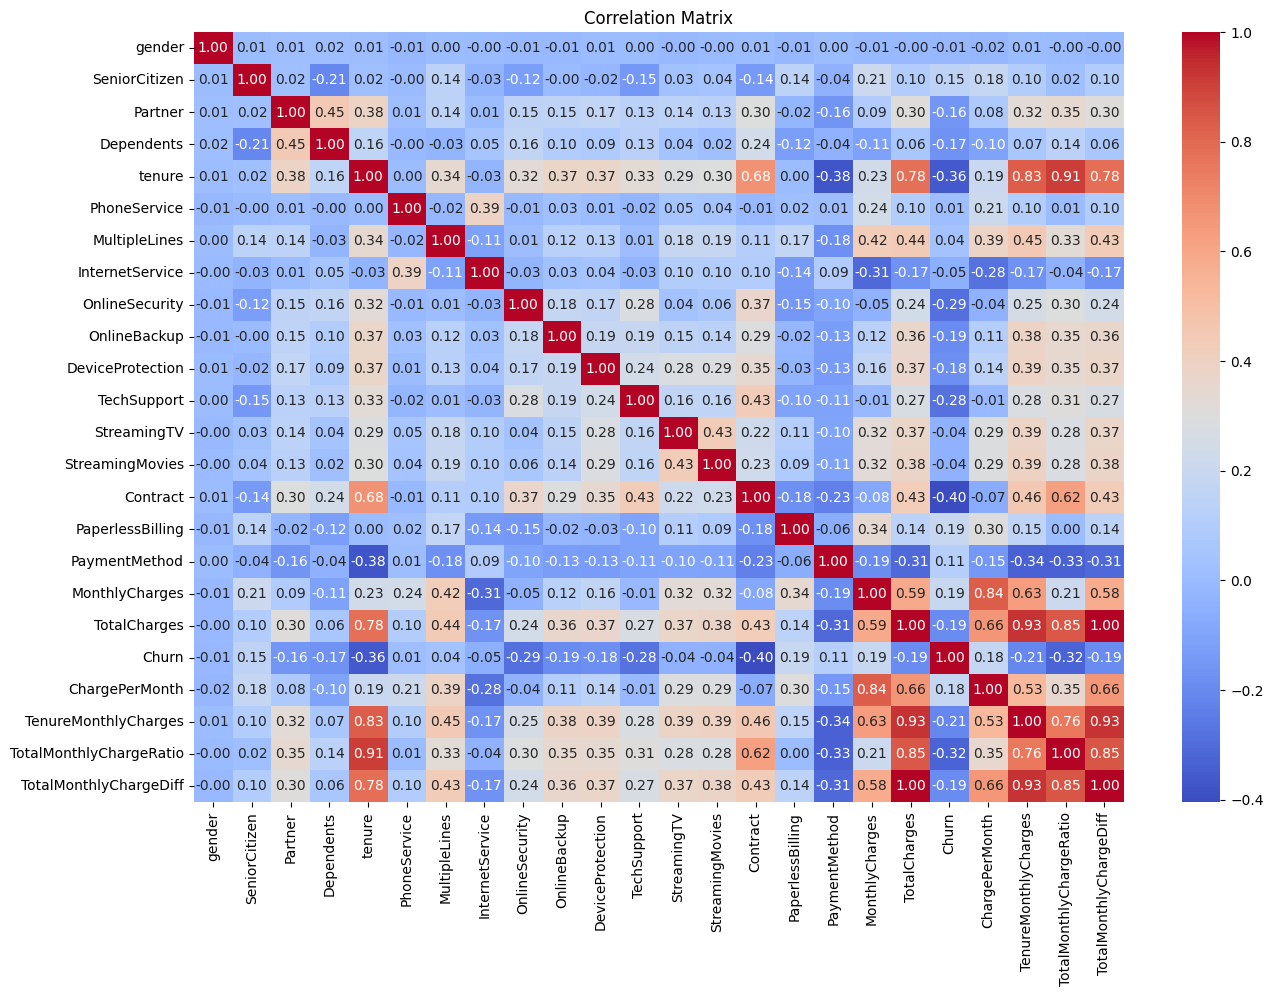

In [97]:

corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [98]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train = X
y_train = y
X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [99]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1044
           1       0.65      0.56      0.60       365

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



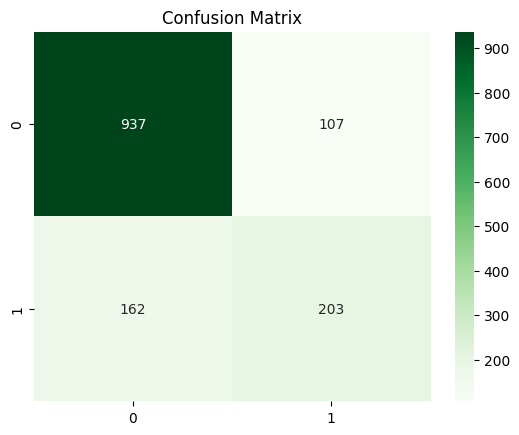

In [102]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# Tune LogisticRegression Model

In [103]:

#define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'penalty': ['l1', 'l2']
              ,'solver': ['liblinear', 'saga']
              }
#create logistic regression object
logreg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logreg, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [104]:
best_logreg_mod = LogisticRegression(C=0.1,penalty='l2', solver='saga')
best_logreg_mod.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='saga')

In [105]:
best_y_pred = best_logreg_mod.predict(X_test)

In [106]:
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1044
           1       0.66      0.55      0.60       365

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



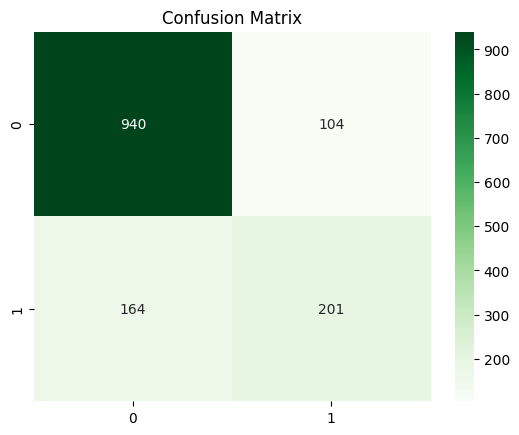

In [107]:
conf_mat = confusion_matrix(y_test, best_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [108]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1044
           1       0.61      0.30      0.40       365

    accuracy                           0.77      1409
   macro avg       0.70      0.62      0.63      1409
weighted avg       0.74      0.77      0.74      1409



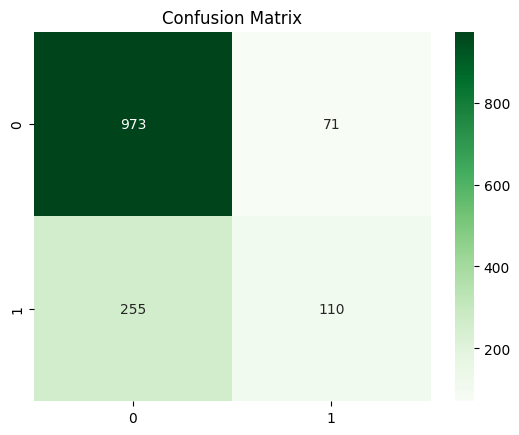

In [110]:
conf_mat = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# KNN Tuning

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=28, weights='uniform', metric='manhattan')
best_knn.fit(X_train, y_train)

In [ ]:
knn_y_pred = best_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_y_pred))

In [ ]:
conf_mat = confusion_matrix(y_test,knn_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test,dt_pred))

In [ ]:
conf_mat = confusion_matrix(y_test, dt_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# DecisionTree Tuning

In [ ]:
tree = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search.best_params_)

In [ ]:
dtbest_model = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=2)
dtbest_model.fit(X_train, y_train)

In [ ]:
dtbest_pred = dtbest_model.predict(X_test)

In [ ]:
print(classification_report(y_test,dtbest_pred))

In [ ]:
conf_mat = confusion_matrix(y_test, dtbest_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [ ]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))


In [ ]:
conf_mat = confusion_matrix(y_test, rf_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()